# Building a Simple Convolutional Neural Net With Own Data

This kernel covers the complete CNN implementation using own dataset of images .The following topics will be covered.

 - Loading and preprocessing own dataset

 - Designing and training a CNN model in Keras

 - Plotting the Loss and Accuracy curve

 - Evaluating the model & Predicting the output class of a test image

 - Visualizing the intermediate layer output of CNN

 - Plotting the confusion matrix for your result
 
 https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-cnn-implementation/notebook

### Loading and preprocessing own dataset

The dataset that I am using for this kernel is from Pavan Sanagapati (Kaggle) accumulated dataset of 7 types of classes namely 'flowers', 'cars', 'cats', 'horses', 'human', 'bike', 'dogs' with total of 1803 image samples.

In [42]:
# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [43]:
PATH = os.getcwd()

#Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)
data_dir_list

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [44]:
img_rows = 128
img_cols = 128
num_channel = 1
num_epoch = 20

#Define number of classes
num_classes = 7

labels_name={'bike':0,'cars':1,'cats':2,'dogs':3,'flowers':4,'horses':5, 'human':6}
             
img_data_list=[]
labels_list = []


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        labels_list.append(label)
    
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

print (img_data.shape)

Loading the images of dataset-bike

Loading the images of dataset-cars

Loading the images of dataset-cats

Loading the images of dataset-dogs

Loading the images of dataset-flowers

Loading the images of dataset-horses

Loading the images of dataset-human

(1805, 128, 128)


In [45]:
labels = np.array(labels_list)

# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))


(array([0, 1, 2, 3, 4, 5, 6]), array([365, 420, 202, 202, 210, 202, 204], dtype=int64))


In [46]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
        
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(1805, 128, 128, 1)


C:\Users\Patrick Munene\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [47]:
# Convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

# Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [48]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1444, 128, 128, 1)
X_test shape = (361, 128, 128, 1)


In [49]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

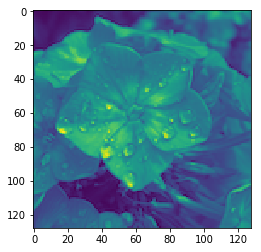

In [50]:
#Visualize some images
image = X_train[1441,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [51]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing
    
    def image_to_feature_vector(image, size=(128, 128)):
        # resize the image to a fixed size, then flatten the image into
        # a list of raw pixel intensities
        return cv2.resize(image, size).flatten()
    
    img_data_list=[]
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten=image_to_feature_vector(input_img,(128,128))
            img_data_list.append(input_img_flatten)
    
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    print (img_data.shape)
    
    img_data_scaled = preprocessing.scale(img_data)
    print (img_data_scaled.shape)
    
    print (np.mean(img_data_scaled))
    print (np.std(img_data_scaled))
    
    print (img_data_scaled.mean(axis=0))
    print (img_data_scaled.std(axis=0))
    
    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)
        
    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)
    
    
    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)
        
    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled


### Designing and training a CNN model in Keras

In [52]:
#Initializing the input shape
input_shape = img_data[0].shape

#Design CNN sequential model
model = Sequential ([
    Convolution2D(32,3,3, border_mode = 'same', activation = 'relu', input_shape = input_shape),
    Convolution2D(32,3,3, activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.5),
    
    Convolution2D(64,3,3, activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.5), 
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes, activation = 'softmax')
])

C:\Users\Patrick Munene\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128,..., padding="same")`
  
C:\Users\Patrick Munene\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
C:\Users\Patrick Munene\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [53]:
#Compiling the model
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = 'adadelta',
    metrics = ['accuracy'])

### View Model Configuration

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 64)        0         
__________

### Train the model

In [55]:
hist = model.fit (X_train, y_train,
                     batch_size = 16,
                     nb_epoch = num_epoch,
                     verbose=1,
                     validation_data = (X_test, y_test)
                     )

C:\Users\Patrick Munene\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 1444 samples, validate on 361 samples
Epoch 1/20
1444/1444 [==============================] - 91s 63ms/step - loss: 1.8635 - acc: 0.2542 - val_loss: 1.7779 - val_acc: 0.3712
Epoch 2/20
1444/1444 [==============================] - 92s 64ms/step - loss: 1.6611 - acc: 0.3483 - val_loss: 1.4632 - val_acc: 0.4515
Epoch 3/20
1444/1444 [==============================] - 94s 65ms/step - loss: 1.5430 - acc: 0.4176 - val_loss: 1.3665 - val_acc: 0.5263
Epoch 4/20
1444/1444 [==============================] - 96s 66ms/step - loss: 1.4291 - acc: 0.4695 - val_loss: 1.2078 - val_acc: 0.5762
Epoch 5/20
1444/1444 [==============================] - 99s 69ms/step - loss: 1.2518 - acc: 0.5499 - val_loss: 1.2371 - val_acc: 0.6011
Epoch 6/20
1444/1444 [==============================] - 98s 68ms/step - loss: 1.1286 - acc: 0.5914 - val_loss: 1.2388 - val_acc: 0.5983
Epoch 7/20
1444/1444 [==============================] - 98s 68ms/step - loss: 1.0250 - acc: 0.6143 - val_loss: 1.1138 - val_acc: 0.6150
E

### Training with callbacks

Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, 
                     batch_size=16, 
                     epochs=num_epoch, 
                     verbose=1, 
                     validation_data=(X_test, y_test),
                     callbacks=callbacks_list)


### Plotting the Loss and Accuracy curve

#### Visualizing Losses & Accuracy

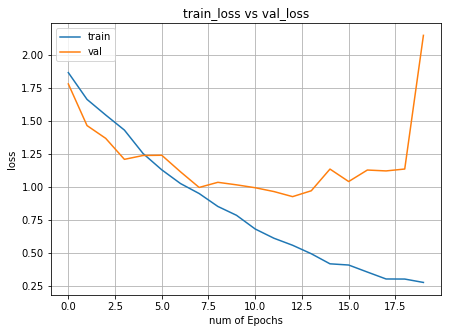

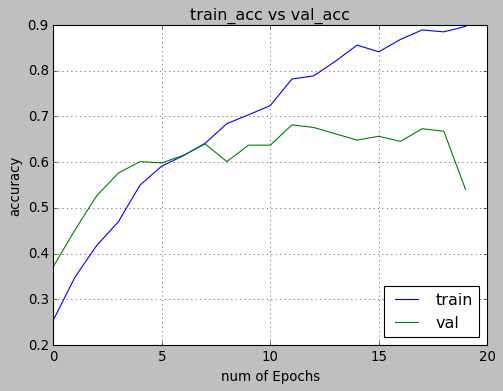

In [56]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

#### Evaluating the model & Predicting the output class of a test image

In [57]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 2.1453204670110897
Test Accuracy: 0.5401662054814791
(1, 128, 128, 1)
[[3.1354125e-07 1.3515505e-06 2.0719397e-04 2.8527658e-03 1.9919095e-04
  6.3660182e-04 9.9610257e-01]]
[6]
[[0. 0. 0. 0. 0. 0. 1.]]


Based on the above results it is evident that predict class is <> .In this case it is a bike. Let us visualise it .

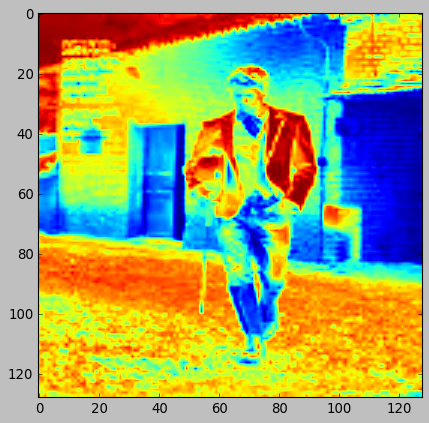

In [58]:
image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

# Test with a New Image

(128, 128)


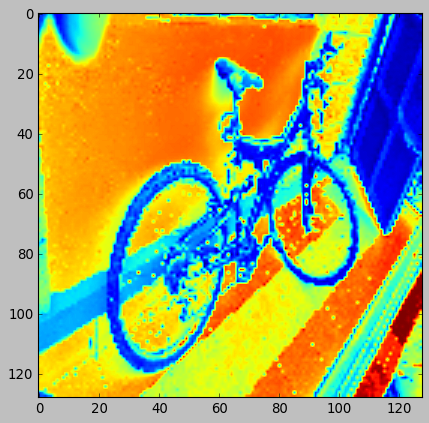

In [59]:
# Testing a new image
test_image = cv2.imread('test/bike001.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

plt.imshow(test_image)
plt.show()

In [60]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3) 
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)

else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)


(1, 128, 128, 1)


C:\Users\Patrick Munene\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


# Predicting the test image

In [61]:
# Predicting the test image
print((model.predict(test_image)))
print('Image class:', model.predict_classes(test_image))

[[3.6560327e-01 2.7960737e-06 1.2630007e-03 2.9311934e-01 1.6894026e-02
  3.0998811e-01 1.3129448e-02]]
Image class: [0]


#### Visualizing the intermediate layer output of CNN

In [62]:
# Visualizing the intermediate layer

def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

(1, 1, 63, 63, 32)
(63, 63, 32)


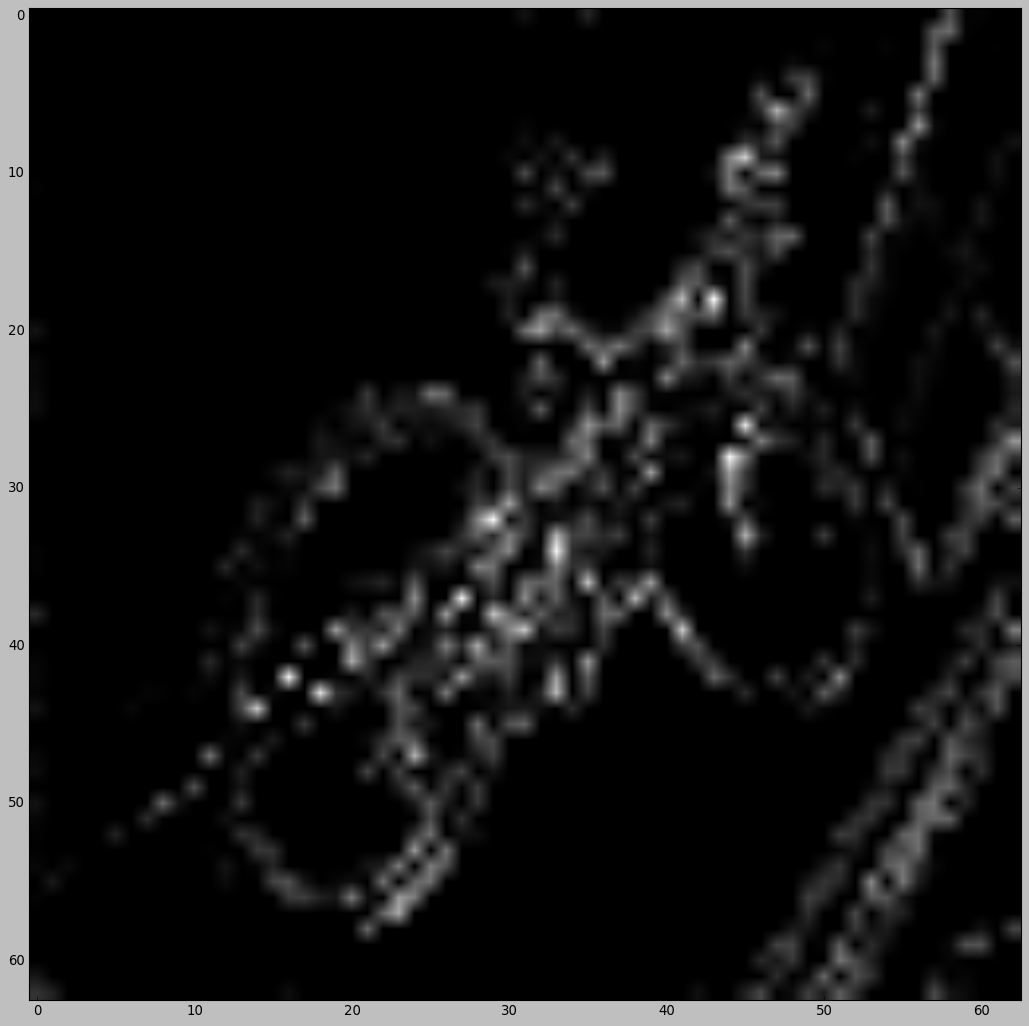

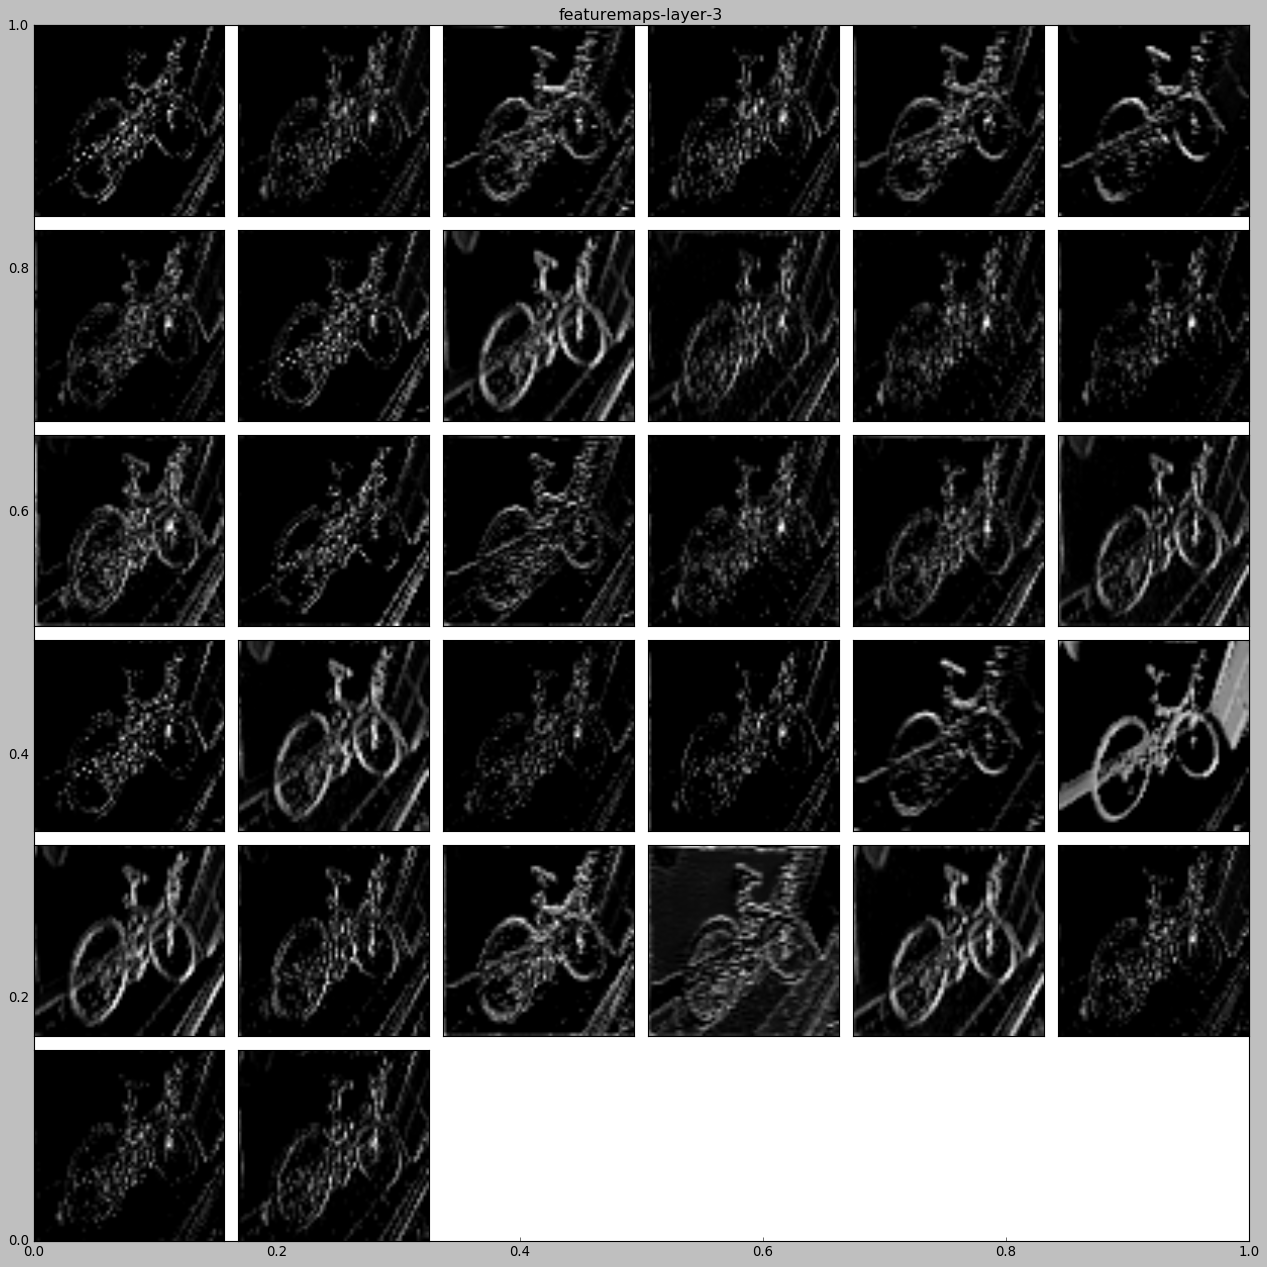

In [63]:
fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

#### Plotting the confusion matrix for your result

In [64]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)



[[3.1354310e-07 1.3515636e-06 2.0719320e-04 ... 1.9918813e-04
  6.3659373e-04 9.9610269e-01]
 [1.0612253e-08 3.6177583e-09 2.6022663e-04 ... 3.7232134e-03
  8.6791825e-01 1.2793995e-01]
 [1.7700897e-06 3.1845258e-05 6.0184859e-04 ... 9.8780292e-01
  5.6868204e-04 1.5705153e-03]
 ...
 [7.7693665e-05 9.9975425e-01 1.5888992e-04 ... 1.8576634e-09
  9.2823889e-08 1.5654624e-06]
 [2.1116603e-06 1.0968279e-06 1.9680201e-05 ... 3.4731522e-04
  8.3160485e-05 9.9795735e-01]
 [4.2878878e-01 1.6548219e-08 4.9009154e-06 ... 1.7006126e-03
  5.3469867e-01 8.6708004e-03]]
[6 5 4 1 1 0 0 4 2 5 6 4 6 4 4 1 5 2 3 1 1 4 3 3 0 2 5 1 4 3 1 4 4 0 4 2 4
 1 4 4 4 4 0 4 5 2 4 1 3 1 1 1 1 6 3 6 3 4 4 0 4 2 3 1 6 6 5 5 4 1 0 3 6 5
 4 4 1 1 6 4 6 1 4 1 5 4 1 4 5 0 0 6 4 5 1 2 5 6 0 1 4 4 0 4 0 2 0 4 1 4 5
 0 2 1 4 5 1 1 1 1 6 4 2 3 6 3 6 0 3 4 4 0 2 3 0 0 4 3 1 6 0 0 0 5 2 0 4 6
 3 4 4 5 6 1 6 4 4 0 5 0 4 1 3 2 1 4 4 3 4 5 1 6 6 2 0 0 0 3 1 6 0 0 3 6 3
 3 5 0 4 6 5 0 4 4 5 4 0 0 1 4 4 0 4 4 0 1 0 4 3 0 0 0 1 3 3 

In [65]:
#y_pred = model.predict_classes(X_test)
#print(y_pred)

target_names=['Class 0 (bike)', 'Class 1 (cars)', 'Class 2 (cats)', 'Class 3 (dogs)',
              'Class 4 (flowers)', 'Class 5 (horses)', 'Class 6 (human)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

                   precision    recall  f1-score   support

   Class 0 (bike)       0.92      0.59      0.72        79
   Class 1 (cars)       0.84      0.63      0.72        82
   Class 2 (cats)       0.30      0.14      0.19        51
   Class 3 (dogs)       0.16      0.24      0.19        34
Class 4 (flowers)       0.39      1.00      0.56        39
 Class 5 (horses)       0.53      0.49      0.51        35
  Class 6 (human)       0.60      0.61      0.60        41

      avg / total       0.61      0.54      0.54       361

[[47 10  5  4  3  4  6]
 [ 4 52  6  8  3  3  6]
 [ 0  0  7 17 22  3  2]
 [ 0  0  4  8 16  4  2]
 [ 0  0  0  0 39  0  0]
 [ 0  0  1  5 11 17  1]
 [ 0  0  0  8  7  1 25]]


In [66]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[47 10  5  4  3  4  6]
 [ 4 52  6  8  3  3  6]
 [ 0  0  7 17 22  3  2]
 [ 0  0  4  8 16  4  2]
 [ 0  0  0  0 39  0  0]
 [ 0  0  1  5 11 17  1]
 [ 0  0  0  8  7  1 25]]


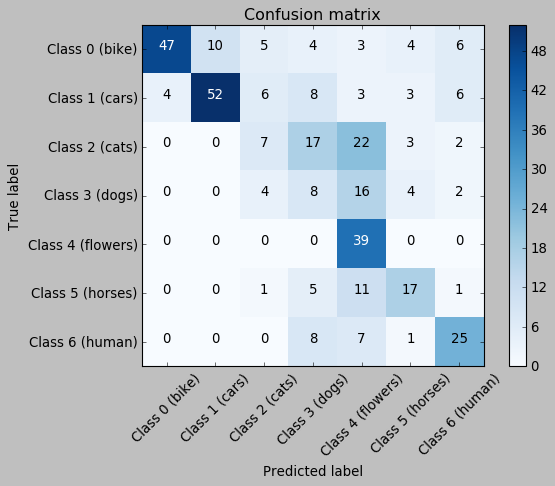

In [67]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [68]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [69]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Loaded model from disk


# To Predict for Different Data, Use This:

In [70]:
#loaded_model.predict_classes("your_test_data here")